<a href="https://colab.research.google.com/github/pedrovidio/alura_imersao_ia/blob/main/var.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A ideia deste projeto é funcionar como o var em uma partida de futebol. A IA deverá analisar a imagem do momento exato do passe e dizer se existe algum jogador impedido.

In [1]:
!pip install -q -U google-generativeai

In [88]:
import google.generativeai as genai
from google.colab import userdata
api_key = userdata.get('SECRET_KEY')

genai.configure(api_key=api_key)

In [70]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


Configurações

In [71]:
  generation_config = {
      'candidate_count': 1,
      'temperature': 0.5
  }

In [72]:
safety_settings = {
    'HARASSMENT': 'BLOCK_NONE',
    'HATE': 'BLOCK_NONE',
    'SEXUAL': 'BLOCK_NONE',
    'DANGEROUS': 'BLOCK_NONE'
}

In [78]:
model = genai.GenerativeModel(
      model_name='gemini-1.5-pro-latest',
      generation_config=generation_config,
      safety_settings=safety_settings
    )

Saving impedido2.jpg to impedido2 (29).jpg
Imagem "impedido2 (29).jpg" com tamanho 9140 bytes carregada.


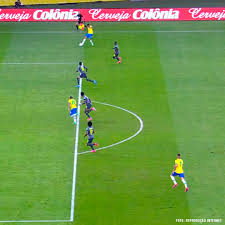

Digite a instrução para processar a imagem: Existe algum lance ilegal na imagem?
Sim, existe um lance ilegal na imagem. O jogador de camisa amarela está em posição de impedimento.
Esperando instrução para saber se o VAR precisa intervir no lance: Qual o número da camisa dele?
O número da camisa dele é 10.
Esperando instrução para saber se o VAR precisa intervir no lance: Ele está com todo o corpo a frente ou apenas com uma parte?
Apenas com uma parte do corpo.
Esperando instrução para saber se o VAR precisa intervir no lance: Quais?
Jogadores de futebol.
Esperando instrução para saber se o VAR precisa intervir no lance: Quais parte do corpo estão a frente?
Cabeças
Esperando instrução para saber se o VAR precisa intervir no lance: intervir
Intervenir.


In [90]:
from google.colab import files
from IPython.display import Image, display

# Função para enviar a imagem
def upload_imagem():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('Imagem "{name}" com tamanho {length} bytes carregada.'.format(
        name=fn, length=len(uploaded[fn])))
    return fn

# Carregar a imagem
nome_imagem = upload_imagem()

# Exibir a imagem
display(Image(nome_imagem))

# Solicitar instrução ao usuário
instrucao = input("Digite a instrução para processar a imagem: ")

prompt_parts = [
  genai.upload_file(Path(imagem)),
  instrucao
]

response = model.generate_content(prompt_parts)
print(response.text)

while instrucao != 'intervir':
  instrucao = input ('Esperando instrução para saber se o VAR precisa intervir no lance: ')
  prompt_parts = [
    genai.upload_file(Path(imagem)),
    instrucao
  ]
  response = model.generate_content(prompt_parts)
  print(response.text)
